# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Imports de base
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import du fichier à analyser
PA75016_df = pd.read_csv("/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/data/pollution/2_Processed/PA75016.csv").copy()
PA75016_df = PA75016_df[:-25]
PA75016_df



,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4,NaN,NaN,75016 - Porte Auteuil,Traffic
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6,NaN,NaN,75016 - Porte Auteuil,Traffic
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1,NaN,NaN,75016 - Porte Auteuil,Traffic
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4,NaN,NaN,75016 - Porte Auteuil,Traffic


# EDA

In [4]:
from workflow.utils import analyse_df

In [5]:
#Analyse du fichier PA75016
analyse_df(PA75016_df)

General Info:
42551 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 2.60Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name', 'Station_type']


,PM25,PM10,NO2,O3,SO2
count,41229.000000,41405.000000,40738.000000,0.0,25444.000000
mean,15.098152,33.391631,73.241266,NaN,1.309079
std,8.906364,17.560687,29.101300,NaN,1.363716
min,0.000000,0.400000,5.100000,NaN,0.000000
25%,9.200000,21.100000,53.500000,NaN,0.200000
50%,13.000000,29.900000,71.100000,NaN,1.000000
75%,18.400000,41.800000,90.300000,NaN,2.000000
max,193.000000,253.000000,286.000000,NaN,75.900000



Cheking Missing Values:
Column "PM25" has 1322 missing values (3.11%)
Column "PM10" has 1146 missing values (2.69%)
Column "NO2" has 1813 missing values (4.26%)
Column "O3" has 42551 missing values (100.00%)
Column "SO2" has 17107 missing values (40.20%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.78


/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/workflow/utils.py:83: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


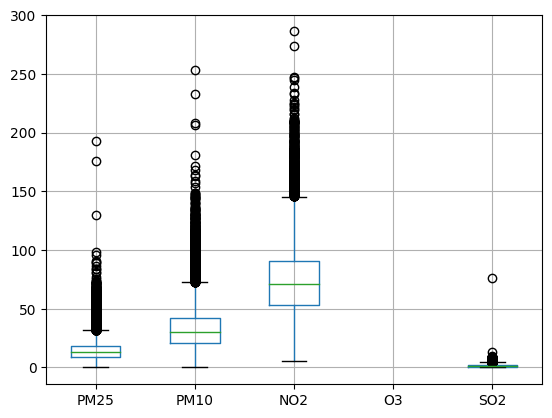

In [6]:
PA75016_df.boxplot();

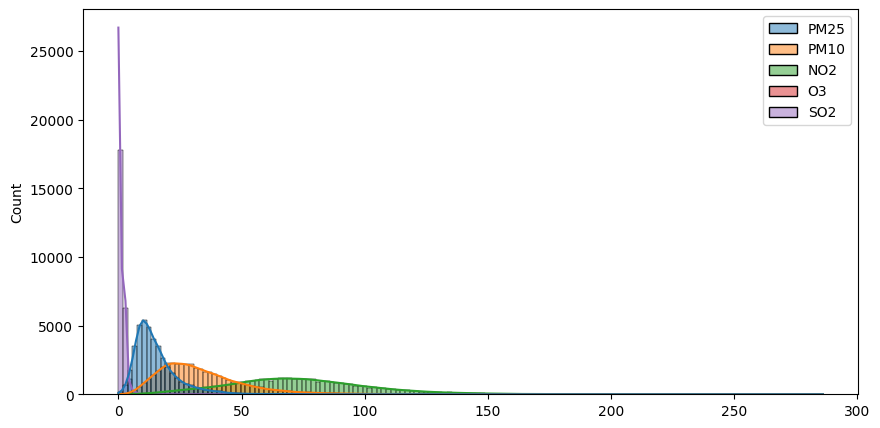

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data=PA75016_df,kde=True,bins=150)
plt.show()

## Conlusion de l'EDA

Synthèse de l'EDA sur la station PA75016:
- De 2018 à 2022, la part de NaN est faible pour les polluants suivants : PM25, PM10 & NO2 (<6% de NaN) --> **À garder.**
- Concernnant le SO2, la part de NaN est faible, progresse à partir de 2020, pour exploser en 2021, et atteindre 100% en 2022. -->  **À dropper.**
- Concernant l'O3, le nombre de NaN est à 100% de 2018 à 2022 --> **À dropper.**

# Preprocessing

In [8]:
## Drop des colonnes avec beaucoup de Nan
PA75016_df = PA75016_df.drop(columns=['O3', 'SO2', 'Station_name', 'Station_type'])
PA75016_df

,Date_time,PM25,PM10,NO2
0,2018/01/01 01:00:00+00,NaN,NaN,NaN
1,2018/01/01 02:00:00+00,NaN,NaN,NaN
2,2018/01/01 03:00:00+00,NaN,NaN,NaN
3,2018/01/01 04:00:00+00,NaN,NaN,NaN
4,2018/01/01 05:00:00+00,NaN,NaN,NaN
...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4


## X & y - SimpleImputer

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

num_features_normal = ['NO2']
num_features_skewed = ['PM25','PM10']

num_imputer_normal = make_pipeline(
    SimpleImputer(strategy='median'))

num_imputer_skewed = make_pipeline(
    SimpleImputer(strategy='median'))

preprocessor_imputer = make_column_transformer(
    (num_imputer_normal, num_features_normal),
    (num_imputer_skewed, num_features_skewed))

preprocessor_imputer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['NO2']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['PM25', 'PM10'])])

In [10]:
PA75016_preprocessed = pd.DataFrame(preprocessor_imputer.fit_transform(PA75016_df))

In [11]:
PA75016_preprocessed = PA75016_preprocessed.rename(columns={0:"PM25",1:"PM10",2:"NO2"})
PA75016_preprocessed = PA75016_preprocessed.set_index(PA75016_df['Date_time'])

In [12]:
PA75016_preprocessed

,PM25,PM10,NO2
Date_time,,,
2018/01/01 01:00:00+00,71.1,13.0,29.9
2018/01/01 02:00:00+00,71.1,13.0,29.9
2018/01/01 03:00:00+00,71.1,13.0,29.9
2018/01/01 04:00:00+00,71.1,13.0,29.9
2018/01/01 05:00:00+00,71.1,13.0,29.9
...,...,...,...
2022/11/13 19:00:00+00,35.4,18.5,18.2
2022/11/13 20:00:00+00,29.6,18.8,21.8
2022/11/13 21:00:00+00,32.1,19.4,29.9


In [13]:
PA75016_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42551 entries, 2018/01/01 01:00:00+00 to 2022/11/13 23:00:00+00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    42551 non-null  float64
 1   PM10    42551 non-null  float64
 2   NO2     42551 non-null  float64
dtypes: float64(3)
memory usage: 1.3+ MB


## X & y - Passer Date_time d'un step horaire à un step journalier

In [14]:
from workflow.daily_basis import mean_max_categorical

PA75016_daily = mean_max_categorical(PA75016_preprocessed)

In [15]:
PA75016_daily

,Date_time,PM25,PM10,NO2
0,2018/01/01,71.10,13.00,29.9
1,2018/01/02,71.10,13.00,29.9
2,2018/01/03,71.10,13.00,29.9
3,2018/01/04,71.10,13.00,29.9
4,2018/01/05,71.10,12.83,36.2
...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0
1771,2022/11/10,55.69,13.10,42.8
1772,2022/11/11,35.26,10.79,25.7
1773,2022/11/12,49.01,23.87,82.2


## Obtenir y

In [16]:
from workflow.calcul_ATMO import general_categorical

PA75016_daily_cat = PA75016_daily.copy()
PA75016_daily_cat = general_categorical(PA75016_daily_cat)
PA75016_daily_cat
from workflow.calcul_ATMO import calcul_ATMO

PA75016_daily_cat = calcul_ATMO(PA75016_daily_cat)
PA75016_daily_cat


,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO
0,2018/01/01,71.10,13.00,29.9,4,0,0,4
1,2018/01/02,71.10,13.00,29.9,4,0,0,4
2,2018/01/03,71.10,13.00,29.9,4,0,0,4
3,2018/01/04,71.10,13.00,29.9,4,0,0,4
4,2018/01/05,71.10,12.83,36.2,4,0,0,4
...,...,...,...,...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0,4,0,0,4
1771,2022/11/10,55.69,13.10,42.8,4,0,1,4
1772,2022/11/11,35.26,10.79,25.7,3,0,0,3
1773,2022/11/12,49.01,23.87,82.2,3,1,1,3


In [169]:


PA75016_daily_cat["Date_time"]= pd.to_datetime(PA75016_daily_cat["Date_time"])
PA75016_daily_cat.dtypes
PA75016_daily_cat
PA75016_daily_cat["year"] = PA75016_daily_cat["Date_time"].dt.year
PA75016_daily_cat["week"] = PA75016_daily_cat["Date_time"].dt.week
PA75016_daily_cat["day"] = PA75016_daily_cat["Date_time"].dt.day
PA75016_daily_cat["month"] = PA75016_daily_cat["Date_time"].dt.month
PA75016_daily_cat["weekday_name"] = PA75016_daily_cat["Date_time"].dt.day_of_week


PA75016_daily_cat["weekday_name"].unique()



#Ici on veut grouper les colonnes de 2018 par semaine et extraire la med

#df_all_year = PA75016_daily_cat.groupby(by=["year","week"],as_index=False).mean()








#df_all_year





/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_9010/1383698881.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  PA75016_daily_cat["week"] = PA75016_daily_cat["Date_time"].dt.week


array([0, 1, 2, 3, 4, 5, 6])

In [24]:
df_all_month = PA75016_daily_cat.groupby(by=["year","month"],as_index=False).mean()

df_all_month
    
    
    

/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_9010/1512528829.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all_month = PA75016_daily_cat.groupby(by=["year","month"],as_index=False).mean()


,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day
0,2018,1,76.916774,15.090968,45.022581,4.580645,0.225806,0.516129,4.580645,2.741935,16.000000
1,2018,2,93.398929,23.745357,78.278571,4.857143,0.678571,1.321429,4.857143,6.928571,14.500000
2,2018,3,93.063548,18.120323,68.622581,4.935484,0.322581,1.129032,4.935484,11.129032,16.000000
3,2018,4,89.835667,15.195333,70.423333,4.866667,0.200000,1.233333,4.866667,15.500000,15.500000
4,2018,5,88.965484,18.448065,70.487097,4.774194,0.354839,1.193548,4.774194,19.870968,16.000000
5,2018,6,89.659333,17.202667,61.230000,4.866667,0.200000,1.033333,4.866667,24.200000,15.500000
6,2018,7,103.715806,16.052903,74.529032,4.774194,0.258065,1.258065,4.774194,28.580645,16.000000
7,2018,8,79.479677,12.781290,67.070968,4.387097,0.064516,1.129032,4.387097,33.000000,16.000000
8,2018,9,91.754667,15.897000,73.986667,4.800000,0.200000,1.166667,4.800000,37.333333,15.500000
9,2018,10,83.502258,18.715484,66.770968,4.612903,0.387097,1.000000,4.612903,41.741935,16.000000


In [ ]:
df_all_month[df_all_month["month"] == 1]


In [26]:
import calendar
df_all_month['month'] = df_all_month['month'].apply(lambda x: calendar.month_abbr[x])
df_all_month



,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day
0,2018,Jan,76.916774,15.090968,45.022581,4.580645,0.225806,0.516129,4.580645,2.741935,16.000000
1,2018,Feb,93.398929,23.745357,78.278571,4.857143,0.678571,1.321429,4.857143,6.928571,14.500000
2,2018,Mar,93.063548,18.120323,68.622581,4.935484,0.322581,1.129032,4.935484,11.129032,16.000000
3,2018,Apr,89.835667,15.195333,70.423333,4.866667,0.200000,1.233333,4.866667,15.500000,15.500000
4,2018,May,88.965484,18.448065,70.487097,4.774194,0.354839,1.193548,4.774194,19.870968,16.000000
5,2018,Jun,89.659333,17.202667,61.230000,4.866667,0.200000,1.033333,4.866667,24.200000,15.500000
6,2018,Jul,103.715806,16.052903,74.529032,4.774194,0.258065,1.258065,4.774194,28.580645,16.000000
7,2018,Aug,79.479677,12.781290,67.070968,4.387097,0.064516,1.129032,4.387097,33.000000,16.000000
8,2018,Sep,91.754667,15.897000,73.986667,4.800000,0.200000,1.166667,4.800000,37.333333,15.500000
9,2018,Oct,83.502258,18.715484,66.770968,4.612903,0.387097,1.000000,4.612903,41.741935,16.000000


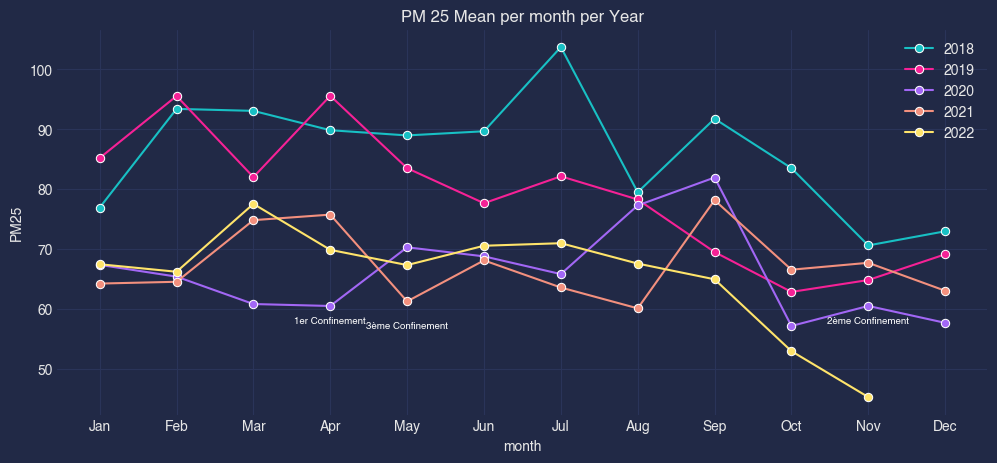

In [27]:
#df_all_month = PA75016_daily_cat.groupby(by=["year","month"]as_index=False).mean()
#df_all_month


import seaborn as sns 
#On veut plotter une année uniquement 
#Ensuite on veut plotter toutes les années sur un plot 

plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


ax1 = sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[:12],
             marker = "o",label="2018")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[12:24],
             marker = "o",label="2019")

sns.lineplot(x = "month", y ="PM25", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[36:48],
             marker = "o",label="2021")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[48:59],
             marker = "o",label="2022").set_title("PM 25 Mean per month per Year")




ax1.text("Apr",58,"1er Confinement", 
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment


ax1.text("Nov",58,"2ème Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.text("May",58,"3ème Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "top") # Vertical alignment





plt.show()










#Ajout d'un marqueur de confinement



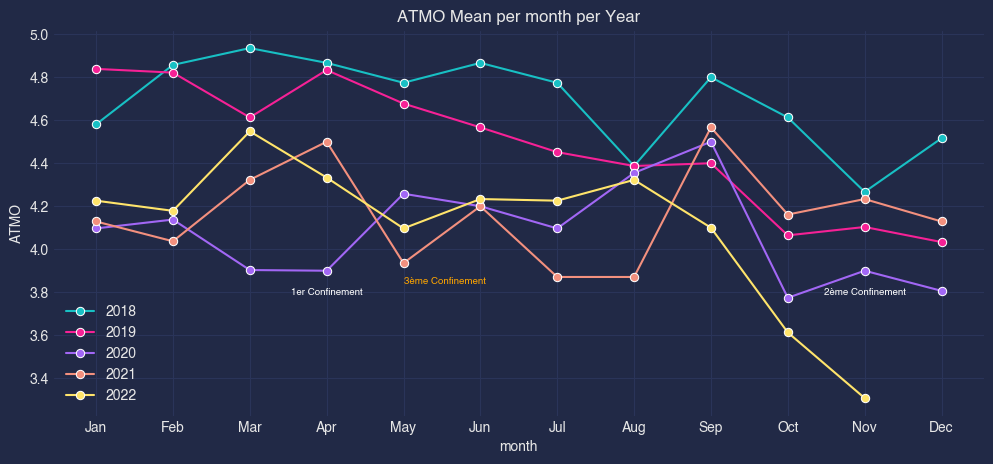

In [43]:
plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


ax1 = sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[:12],
                   
             marker = "o",label="2018")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             
             marker = "o",label="2019")

sns.lineplot(x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             
             marker = "o",label="2020")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             
             marker = "o",label="2021")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             
             marker = "o",label="2022").set_title("ATMO Mean per month per Year")



ax1.text("Apr",3.8,"1er Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
         
         
         
       va = "center") # Vertical alignment


ax1.text("Nov",3.8,"2ème Confinement", 
         
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
       color = "white",          # Color
         
         
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.text("May",3.85,"3ème Confinement", 
         
         
 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "orange",          # Color
         
       ha = "left", # Horizontal alignment
         
         
         
       va = "center") # Vertical alignment


plt.show()




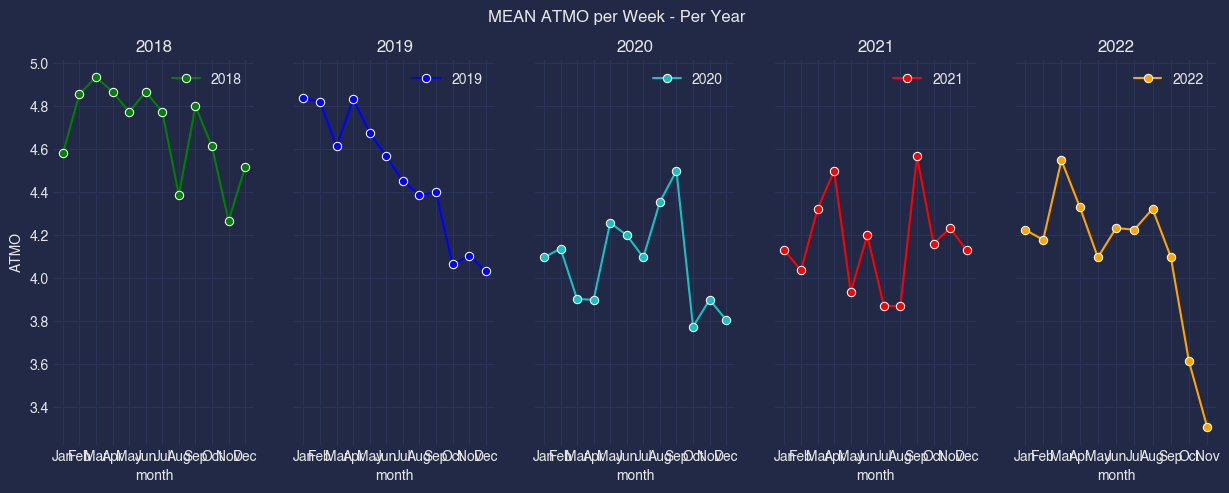

In [44]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")
axes[0].set_title("2018")



# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange").set_title("ATMO Mean per Week per Year")

axes[4].set_title("2022")




#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()







In [88]:
df_all_month


,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day
0,2018,Jan,76.916774,15.090968,45.022581,4.580645,0.225806,0.516129,4.580645,2.741935,16.000000
1,2018,Feb,93.398929,23.745357,78.278571,4.857143,0.678571,1.321429,4.857143,6.928571,14.500000
2,2018,Mar,93.063548,18.120323,68.622581,4.935484,0.322581,1.129032,4.935484,11.129032,16.000000
3,2018,Apr,89.835667,15.195333,70.423333,4.866667,0.200000,1.233333,4.866667,15.500000,15.500000
4,2018,May,88.965484,18.448065,70.487097,4.774194,0.354839,1.193548,4.774194,19.870968,16.000000
5,2018,Jun,89.659333,17.202667,61.230000,4.866667,0.200000,1.033333,4.866667,24.200000,15.500000
6,2018,Jul,103.715806,16.052903,74.529032,4.774194,0.258065,1.258065,4.774194,28.580645,16.000000
7,2018,Aug,79.479677,12.781290,67.070968,4.387097,0.064516,1.129032,4.387097,33.000000,16.000000
8,2018,Sep,91.754667,15.897000,73.986667,4.800000,0.200000,1.166667,4.800000,37.333333,15.500000
9,2018,Oct,83.502258,18.715484,66.770968,4.612903,0.387097,1.000000,4.612903,41.741935,16.000000


In [76]:
df_mean_year = PA75016_daily_cat.groupby(by=["year"],as_index=False).mean()
df_mean_year



/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_9010/1966568787.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_year = PA75016_daily_cat.groupby(by=["year"],as_index=False).mean()


,year,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,month
0,2018,86.102274,17.196356,65.139178,4.684932,0.301370,1.041096,4.684932,26.430137,15.720548,6.526027
1,2019,78.794490,15.632727,59.977686,4.482094,0.212121,0.947658,4.482094,26.311295,15.721763,6.498623
2,2020,66.104918,12.760929,48.924044,4.076503,0.092896,0.661202,4.076503,26.928962,15.756831,6.513661
3,2021,67.288242,14.755659,51.781319,4.162088,0.159341,0.706044,4.162088,26.634615,15.736264,6.538462
4,2022,66.624858,14.783596,50.240379,4.151420,0.167192,0.687697,4.151420,23.182965,15.356467,5.750789


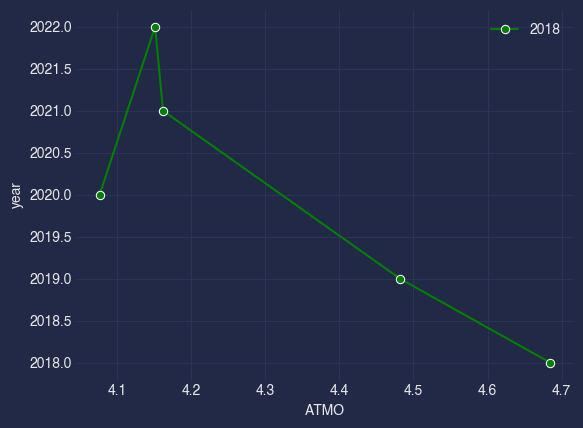

In [87]:
sns.lineplot( x = "ATMO", y = "year", data=df_mean_year.iloc[0:12],
             
             
             
             
             marker = "o",label="2018",color = "green")
plt.show()












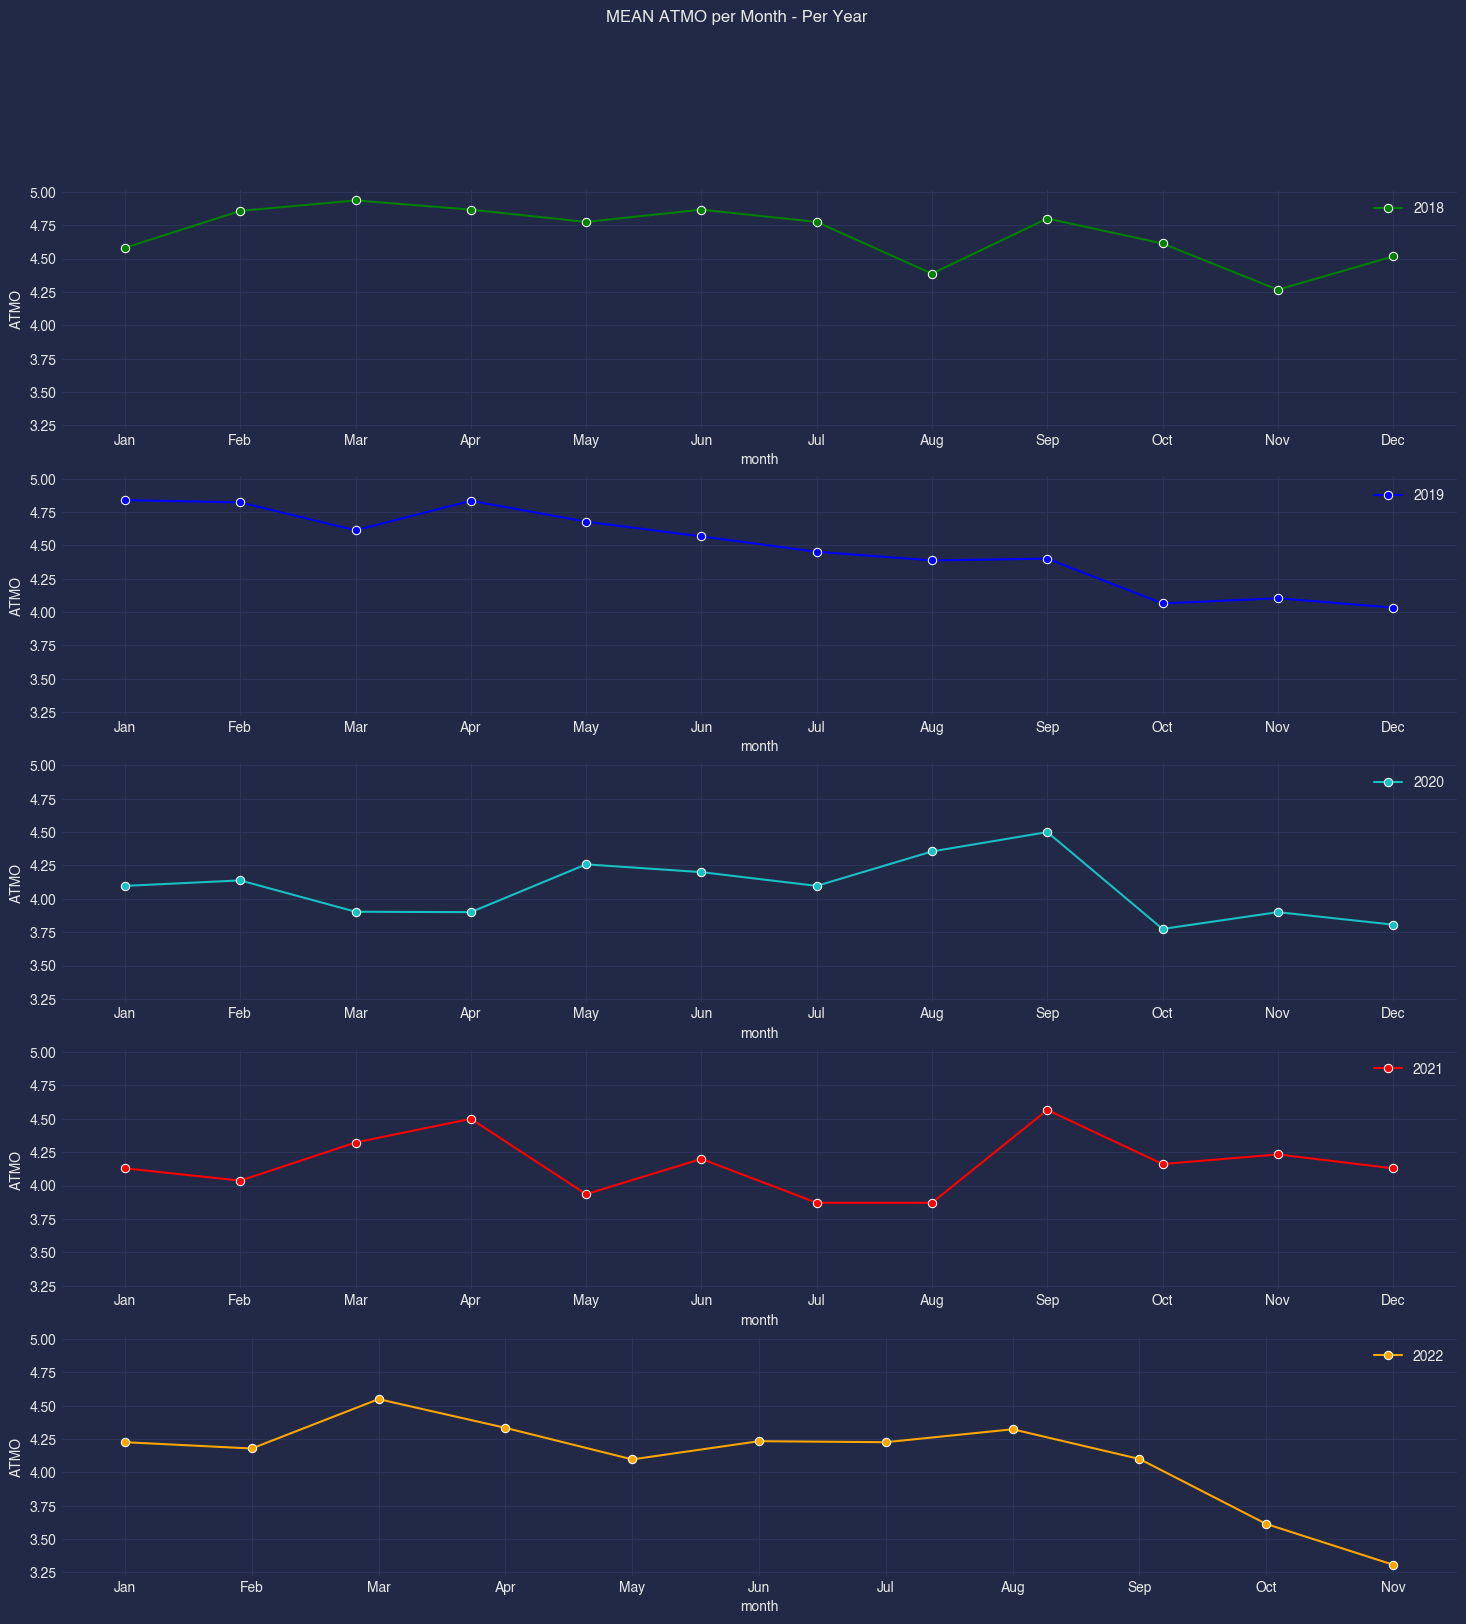

In [135]:
fig, axes = plt.subplots(5, 1, figsize=(18, 18), sharey=True)





fig.suptitle('MEAN ATMO per Month - Per Year')


# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")
#axes[0].set_title("2018")

#sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
            # marker = "o",label="2018",color = "green")
    



    



# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")





#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()

In [ ]:
df_all_month[:]

In [ ]:
import seaborn as sns 
#On veut plotter une année uniquement 
#Ensuite on veut plotter toutes les années sur un plot 

plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')






sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[:52],
             marker = "o",label="2018")




sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[52:104],
             marker = "o",label="2019")

sns.lineplot(x = "week", y ="PM25", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")

sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[156:208],
             marker = "o",label="2021")

sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[208:255],
             marker = "o",label="2022").set_title("PM 25 Mean per Week per Year")

plt.show()























In [ ]:
df_all_year


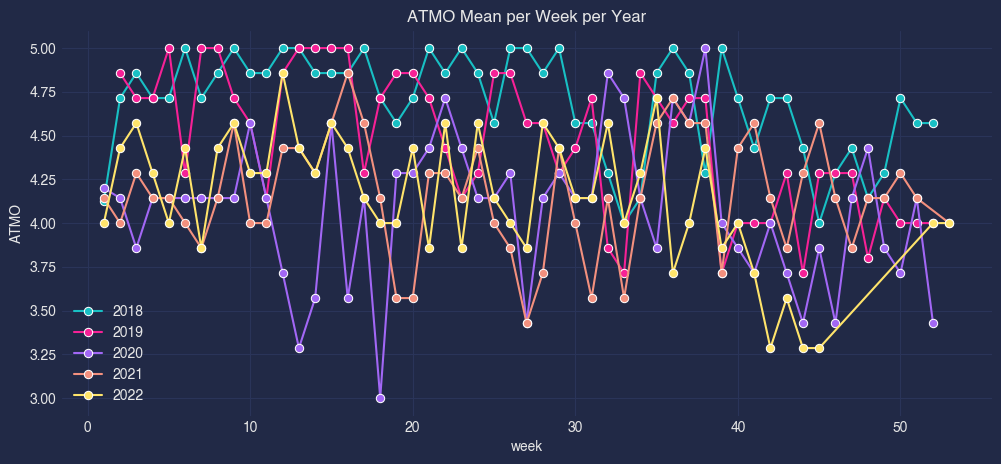

In [74]:

plt.figure(figsize=(12,5))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')







sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018")




sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019")

sns.lineplot(x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")

sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021")

sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022").set_title("ATMO Mean per Week per Year")

plt.show()





In [22]:
f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(13,3))


sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018") ax1.set_title("ATMO Mean per Week in 2018")ax[0]



#ax2.sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             #marker = "o",label="2019"); ax2.set_title("Multiplicative Model Residuals");

    
    


SyntaxError: invalid syntax (1671957835.py, line 5)

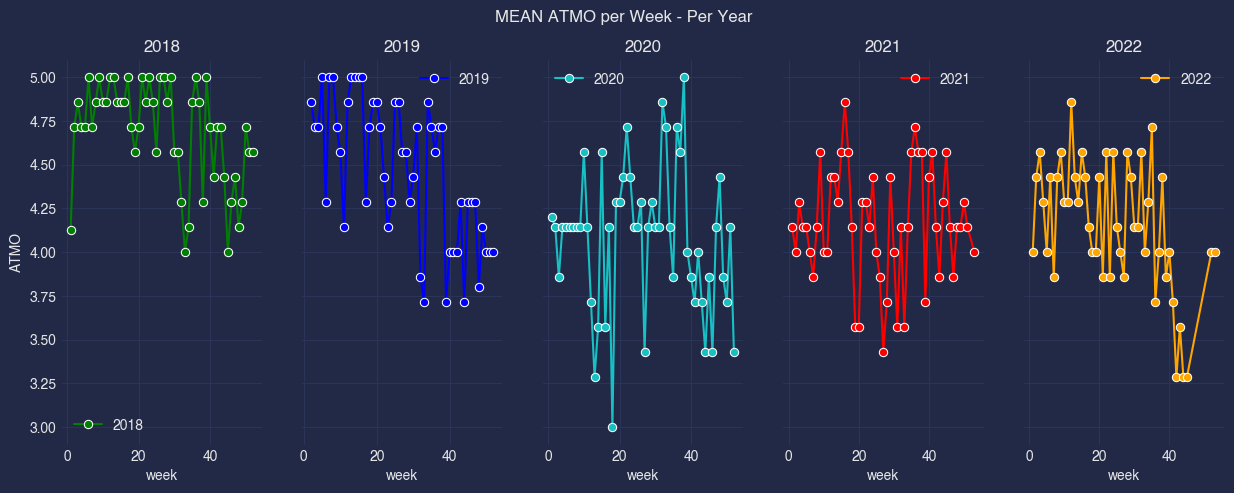

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018",color = "green")
axes[0].set_title("2018")



# 2019
sns.lineplot(ax=axes[1],x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019",color="b")


axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")
axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021",color="r")

axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022",color="orange").set_title("ATMO Mean per Week per Year")

axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()










In [104]:
df_mean_year


,year,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,month
0,2018,86.102274,17.196356,65.139178,4.684932,0.301370,1.041096,4.684932,26.430137,15.720548,6.526027
1,2019,78.794490,15.632727,59.977686,4.482094,0.212121,0.947658,4.482094,26.311295,15.721763,6.498623
2,2020,66.104918,12.760929,48.924044,4.076503,0.092896,0.661202,4.076503,26.928962,15.756831,6.513661
3,2021,67.288242,14.755659,51.781319,4.162088,0.159341,0.706044,4.162088,26.634615,15.736264,6.538462
4,2022,66.624858,14.783596,50.240379,4.151420,0.167192,0.687697,4.151420,23.182965,15.356467,5.750789


In [127]:
plt.plot([0,df_mean_year["ATMO"][0] ], [0,df_mean_year["ATMO"][0]], linewidth=2)
plt.show






<function matplotlib.pyplot.show(close=None, block=None)>

In [126]:
import matplotlib.pyplot as plt
plt.axline(xy1=(0,0),xy2=(0,df_mean_year["ATMO"][0]))
plt.show;





           
    
           
           




In [114]:
plt.plot([0,2], [0,4], linewidth=2)

plt.show;



In [ ]:
sns.lineplot(ax=axes[0], x ="year" , y = "ATMO", data=df_mean_year.iloc[:52],
             marker = "o",label="Mean 2018",color = "green")

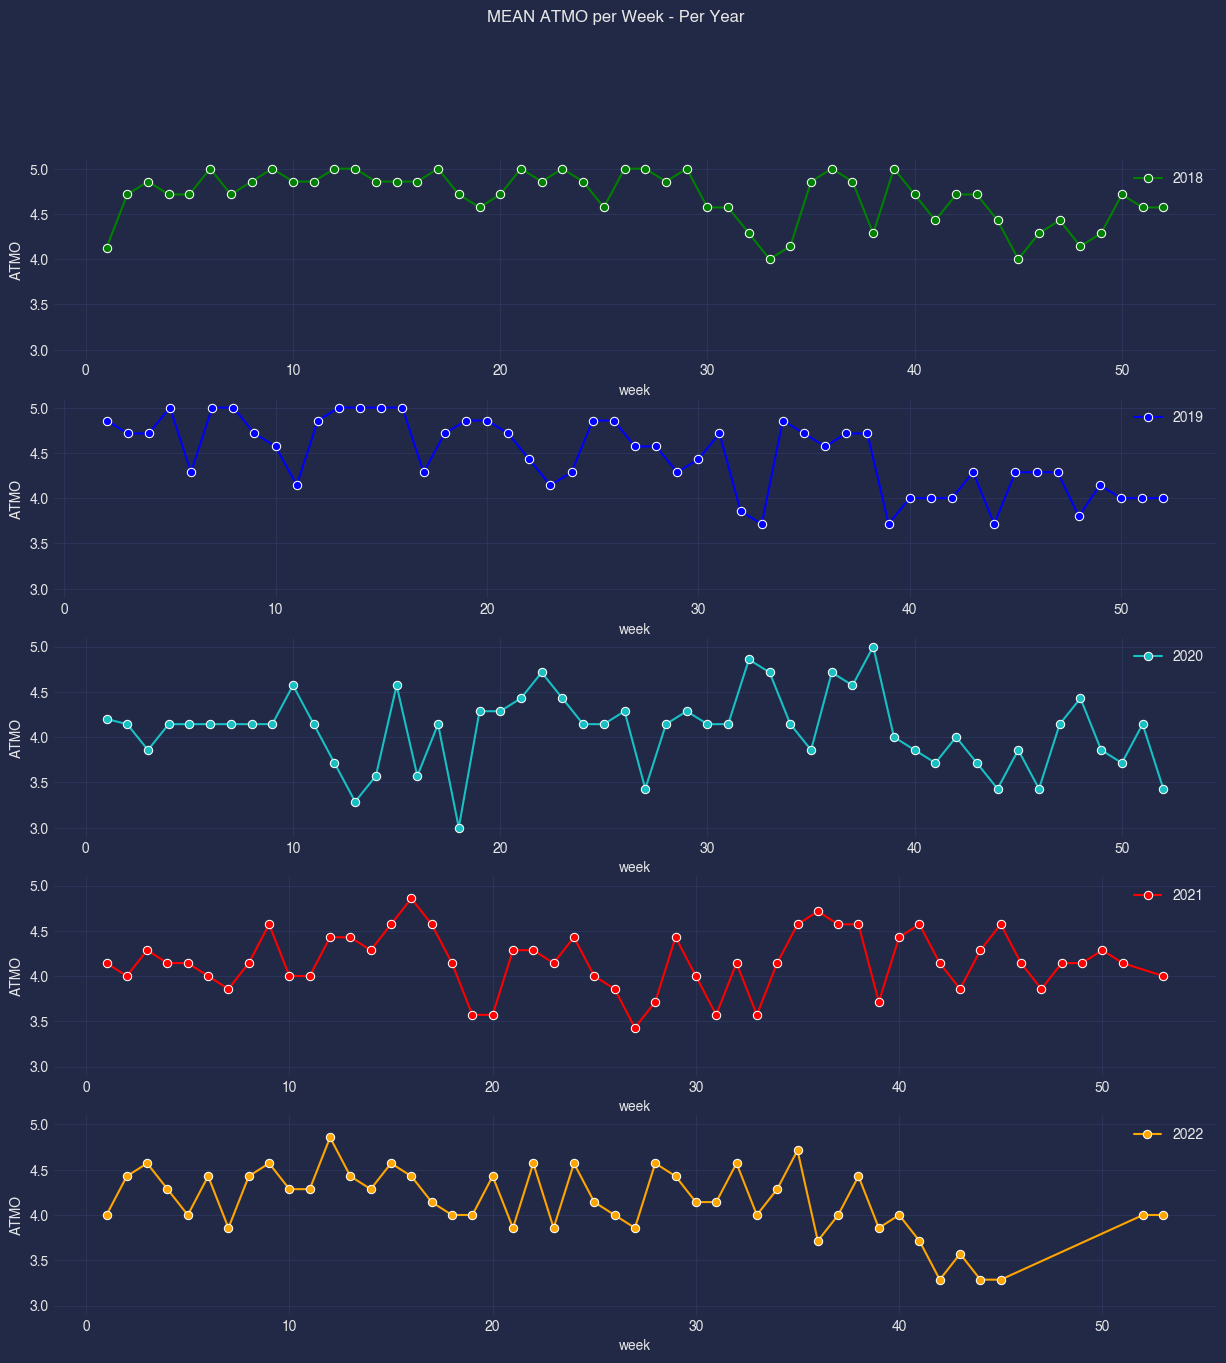

In [131]:
import numpy as np


fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharey=True)




fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018",color = "green")


#on veut tracer une ligne droite qui prend en y l'ATMO moyen de l'année 

#sns.lineplot(ax=axes[0], x = , y = "ATMO", data=df_mean_year.iloc[:52],marker = "o",label="Mean 2018",color = "green")




#axes[0].set_title("2018")





# 2019
sns.lineplot(ax=axes[1],x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()










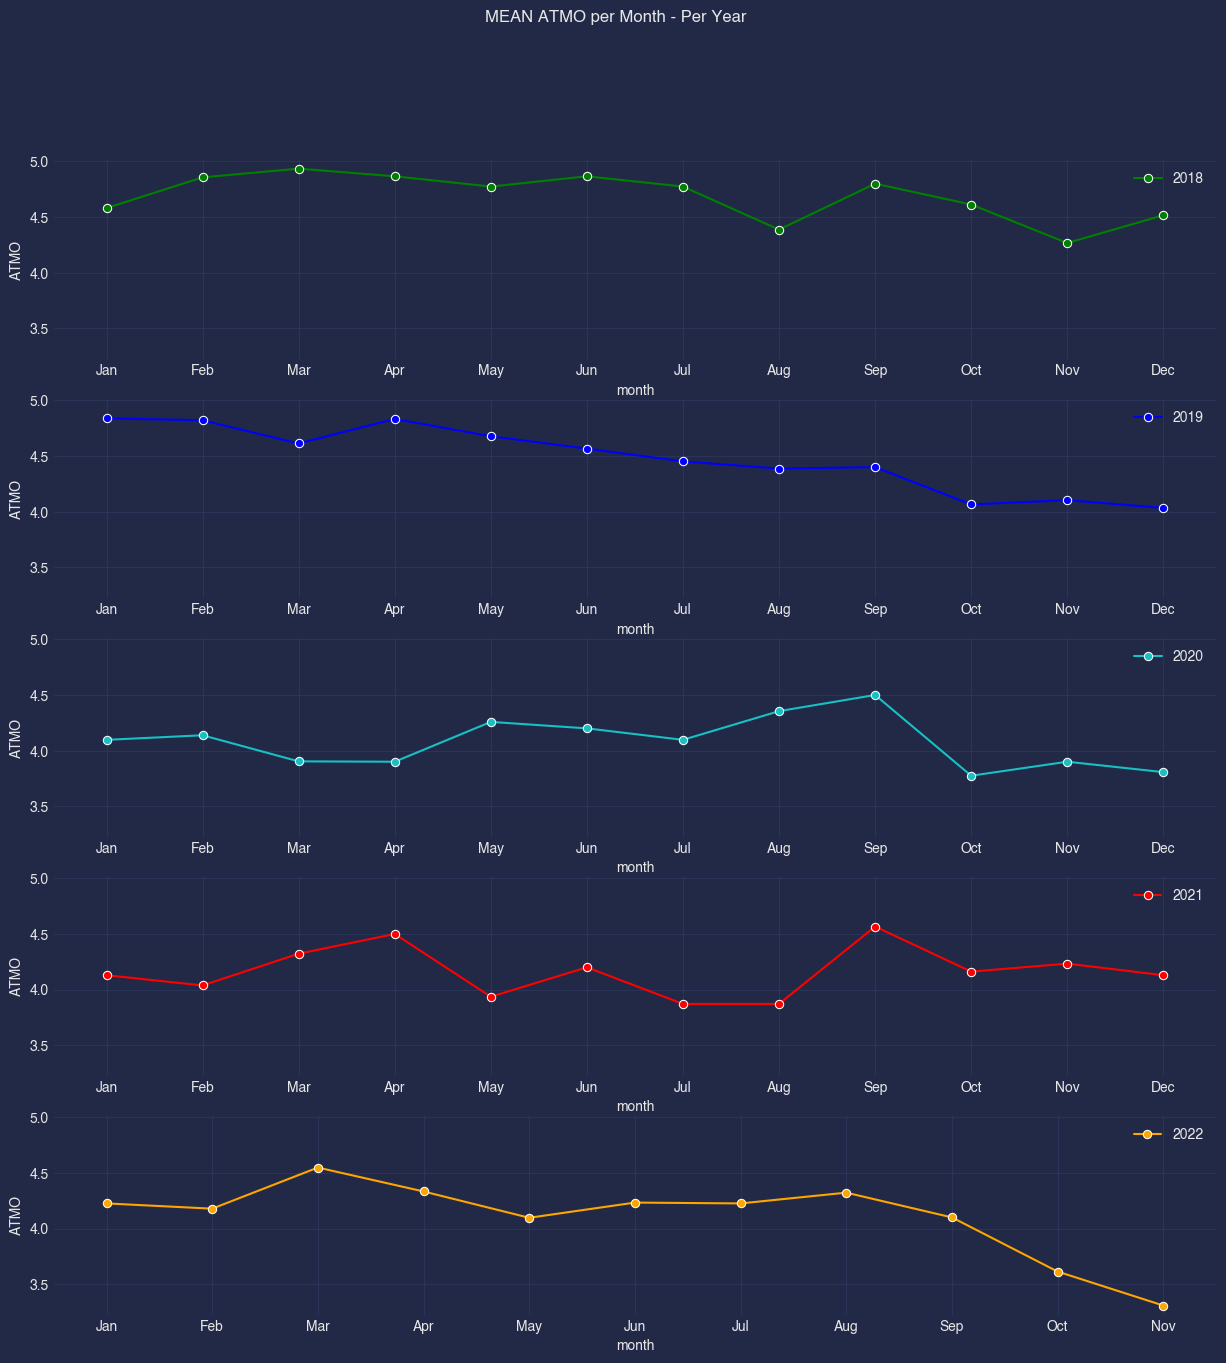

In [133]:
import numpy as np


fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharey=True)




fig.suptitle('MEAN ATMO per Month - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")


#on veut tracer une ligne droite qui prend en y l'ATMO moyen de l'année 

#sns.lineplot(ax=axes[0], x = , y = "ATMO", data=df_mean_month.iloc[:52],marker = "o",label="Mean 2018",color = "green")




#axes[0].set_title("2018")





# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()












In [195]:
PA75016_daily_cat.head(10)



,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,0
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,1
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,2
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,3
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,4
5,2018-01-06,71.10,17.20,54.7,4,0,1,4,2018,1,6,1,5
6,2018-01-07,71.10,22.75,43.0,4,1,1,4,2018,1,7,1,6
7,2018-01-08,75.84,21.22,68.0,5,1,1,5,2018,2,8,1,0
8,2018-01-09,61.04,23.33,69.0,4,1,1,4,2018,2,9,1,1
9,2018-01-10,83.58,13.71,66.1,5,0,1,5,2018,2,10,1,2


In [197]:
df_days



,weekday_name,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month
0,Fri,76.911142,15.398346,58.256693,4.444882,0.185039,0.881890,4.444882,2019.948819,25.984252,15.622047,6.385827
1,Mon,72.955236,14.400394,54.742520,4.318898,0.165354,0.783465,4.318898,2019.937008,25.984252,15.692913,6.393701
2,Sat,72.117352,15.296838,50.878656,4.304348,0.197628,0.719368,4.304348,2019.956522,25.897233,15.600791,6.351779
3,Sun,64.838458,14.214783,46.681818,3.996047,0.169960,0.596838,3.996047,2019.956522,25.897233,15.758893,6.379447
4,Thu,75.768819,15.239764,58.898819,4.366142,0.188976,0.921260,4.366142,2019.944882,25.984252,15.696850,6.397638
5,Tue,74.956181,14.926496,57.245276,4.374016,0.196850,0.858268,4.374016,2019.940945,25.984252,15.618110,6.381890
6,Wed,74.454941,15.738182,60.645455,4.403162,0.205534,0.920949,4.403162,2019.940711,26.063241,15.675889,6.383399


In [200]:
#import calendar
df_days_1 = PA75016_daily_cat.copy()
df_days_1['weekday_name'] = df_days_1['weekday_name'].apply(lambda x: calendar.day_name[x])
df_days_1








,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,Monday
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,Tuesday
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,Wednesday
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,Thursday
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2022-11-09,57.41,9.46,36.0,4,0,0,4,2022,45,9,11,Wednesday
1771,2022-11-10,55.69,13.10,42.8,4,0,1,4,2022,45,10,11,Thursday
1772,2022-11-11,35.26,10.79,25.7,3,0,0,3,2022,45,11,11,Friday
1773,2022-11-12,49.01,23.87,82.2,3,1,1,3,2022,45,12,11,Saturday


In [162]:
PA75016_daily_cat


,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,0
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,1
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,2
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,3
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2022-11-09,57.41,9.46,36.0,4,0,0,4,2022,45,9,11,2
1771,2022-11-10,55.69,13.10,42.8,4,0,1,4,2022,45,10,11,3
1772,2022-11-11,35.26,10.79,25.7,3,0,0,3,2022,45,11,11,4
1773,2022-11-12,49.01,23.87,82.2,3,1,1,3,2022,45,12,11,5


In [198]:
PA75016_daily_cat



,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,0
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,1
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,2
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,3
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2022-11-09,57.41,9.46,36.0,4,0,0,4,2022,45,9,11,2
1771,2022-11-10,55.69,13.10,42.8,4,0,1,4,2022,45,10,11,3
1772,2022-11-11,35.26,10.79,25.7,3,0,0,3,2022,45,11,11,4
1773,2022-11-12,49.01,23.87,82.2,3,1,1,3,2022,45,12,11,5


In [204]:
df_days_1 =  df_days_1.groupby(by=['weekday_name'],as_index=False).mean()
df_days_1


df_days_1.sort_values(by=['weekday_name'])










#On veut La moyenne de chaque jour de la semaine 
#il faut donc faire une fonction qui permet de transcrire que le jour de la semaine 


,weekday_name,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month
0,Friday,76.911142,15.398346,58.256693,4.444882,0.185039,0.881890,4.444882,2019.948819,25.984252,15.622047,6.385827
1,Monday,72.955236,14.400394,54.742520,4.318898,0.165354,0.783465,4.318898,2019.937008,25.984252,15.692913,6.393701
2,Saturday,72.117352,15.296838,50.878656,4.304348,0.197628,0.719368,4.304348,2019.956522,25.897233,15.600791,6.351779
3,Sunday,64.838458,14.214783,46.681818,3.996047,0.169960,0.596838,3.996047,2019.956522,25.897233,15.758893,6.379447
4,Thursday,75.768819,15.239764,58.898819,4.366142,0.188976,0.921260,4.366142,2019.944882,25.984252,15.696850,6.397638
5,Tuesday,74.956181,14.926496,57.245276,4.374016,0.196850,0.858268,4.374016,2019.940945,25.984252,15.618110,6.381890
6,Wednesday,74.454941,15.738182,60.645455,4.403162,0.205534,0.920949,4.403162,2019.940711,26.063241,15.675889,6.383399


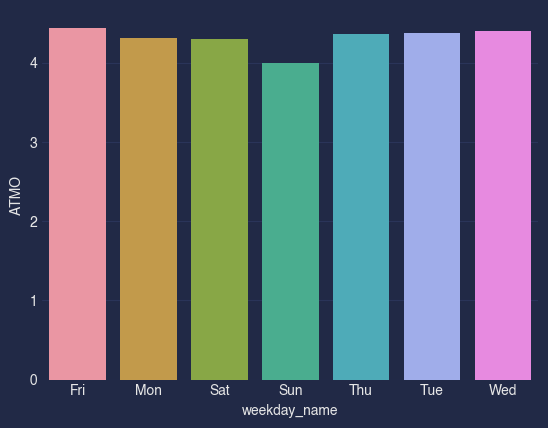

In [205]:
sns.barplot(data=df_days,x="weekday_name",y="ATMO")




plt.show()









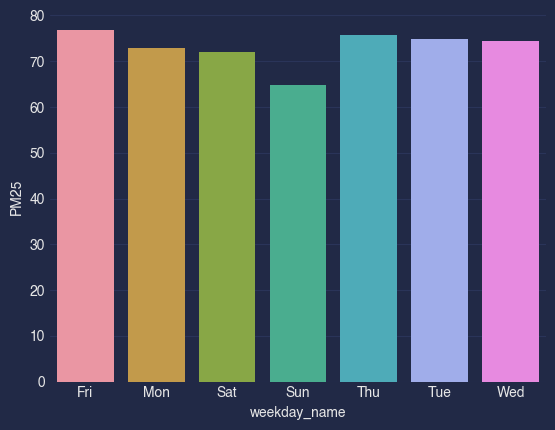

In [209]:
sns.barplot(data=df_days,x="weekday_name",y="PM25")







plt.show()

In [207]:
df_all_month


,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day
0,2018,Jan,76.916774,15.090968,45.022581,4.580645,0.225806,0.516129,4.580645,2.741935,16.000000
1,2018,Feb,93.398929,23.745357,78.278571,4.857143,0.678571,1.321429,4.857143,6.928571,14.500000
2,2018,Mar,93.063548,18.120323,68.622581,4.935484,0.322581,1.129032,4.935484,11.129032,16.000000
3,2018,Apr,89.835667,15.195333,70.423333,4.866667,0.200000,1.233333,4.866667,15.500000,15.500000
4,2018,May,88.965484,18.448065,70.487097,4.774194,0.354839,1.193548,4.774194,19.870968,16.000000
5,2018,Jun,89.659333,17.202667,61.230000,4.866667,0.200000,1.033333,4.866667,24.200000,15.500000
6,2018,Jul,103.715806,16.052903,74.529032,4.774194,0.258065,1.258065,4.774194,28.580645,16.000000
7,2018,Aug,79.479677,12.781290,67.070968,4.387097,0.064516,1.129032,4.387097,33.000000,16.000000
8,2018,Sep,91.754667,15.897000,73.986667,4.800000,0.200000,1.166667,4.800000,37.333333,15.500000
9,2018,Oct,83.502258,18.715484,66.770968,4.612903,0.387097,1.000000,4.612903,41.741935,16.000000
